# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['cape town', 'paamiut', 'saskylakh', 'illoqqortoormiut', 'yellowknife', 'omboue', 'rikitea', 'krasnyy', 'atuona', 'broome', 'mayumba', 'tilichiki', 'mys shmidta', 'bredasdorp', 'busselton', 'ribeira grande', 'lamar', 'east london', 'dingle', 'lorengau', 'tuktoyaktuk', 'hobart', 'pekan', 'koshki', 'samusu', 'esperance', 'ushuaia', 'punta arenas', 'uglich', 'qaanaaq', 'kamina', 'barcelos', 'vlakhopoulon', 'port-gentil', 'hilo', 'kapaa', 'narsaq', 'maceio', 'atikokan', 'baykit', 'katsuura', 'gornyy', 'the valley', 'khatanga', 'mataura', 'pingxiang', 'tura', 'luderitz', 'muzhi', 'novorzhev', 'avarua', 'salvador', 'jamestown', 'dzhusaly', 'marcona', 'tiksi', 'kruisfontein', 'albany', 'butaritari', 'sao filipe', 'airai', 'constitucion', 'barabinsk', 'touros', 'mar del plata', 'sol-iletsk', 'bella vista', 'saldanha', 'vinh', 'aklavik', 'belushya guba', 'taolanaro', 'talnakh', 'oga', 'richards bay', 'upernavik', 'tessalit', 'port elizabeth', 'arlit', 'talara', 'elban', 'sento se', 'bambous vi

In [10]:
#create new data frame with cities
weather_df = pd.DataFrame({'City':cities,"Cloudiness":"","Country":"","Date":"","Humidity":"","Lat":"","Lng":"","Max Temp":"","Wind Speed":""})
weather_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cape town,,,,,,,,
1,paamiut,,,,,,,,
2,saskylakh,,,,,,,,
3,illoqqortoormiut,,,,,,,,
4,yellowknife,,,,,,,,
5,omboue,,,,,,,,
6,rikitea,,,,,,,,
7,krasnyy,,,,,,,,
8,atuona,,,,,,,,
9,broome,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
for index, row in weather_df.iterrows():
    
    city = row['City']
    
    try:

        # Save config information
        url = "http://api.openweathermap.org/data/2.5/weather?"

        # Build query URL
        query_url = url + "appid=" + api_key + "&units=imperial"+ "&q=" + city

        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        # Get the temperature from the response
        print(f"The weather API responded with: {weather_json}.")

        Cloudiness = weather_json['clouds']['all']
        Country = weather_json['sys']['country']
        Date = weather_json["dt"]
        Humidity = weather_json['main']['humidity']
        Lat = weather_json['coord']['lat']
        Lng = weather_json['coord']['lon']
        Max_Temp = weather_json['main']['temp_max']
        Wind_Speed = weather_json['wind']['speed']

        print(f"The results for {city} are:")
        print(Cloudiness)
        print(Country)
        print(Date)
        print(Humidity)
        print(Lat)
        print(Lng)
        print(Max_Temp)
        print(Wind_Speed)

    except KeyError:

        print("No City Found")


    weather_df.loc[index, "Cloudiness"] = Cloudiness
    weather_df.loc[index, "Country"] = Country
    weather_df.loc[index, "Date"] = Date
    weather_df.loc[index, "Humidity"] = Humidity
    weather_df.loc[index, "Lat"] = Lat
    weather_df.loc[index, "Lng"] = Lng
    weather_df.loc[index, "Max Temp"] = Max_Temp
    weather_df.loc[index, "Wind Speed"] = Wind_Speed

print("All searches complete")
weather_df


The weather API responded with: {'coord': {'lon': 18.42, 'lat': -33.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 69.12, 'pressure': 1013, 'humidity': 73, 'temp_min': 68, 'temp_max': 71.01}, 'visibility': 10000, 'wind': {'speed': 3.36}, 'clouds': {'all': 0}, 'dt': 1552600373, 'sys': {'type': 1, 'id': 1899, 'message': 0.0033, 'country': 'ZA', 'sunrise': 1552538711, 'sunset': 1552583094}, 'id': 3369157, 'name': 'Cape Town', 'cod': 200}.
The results for cape town are:
0
ZA
1552600373
73
-33.93
18.42
71.01
3.36
The weather API responded with: {'coord': {'lon': -49.67, 'lat': 61.99}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 21.26, 'pressure': 1003.01, 'humidity': 100, 'temp_min': 21.26, 'temp_max': 21.26, 'sea_level': 1003.01, 'grnd_level': 1000.22}, 'wind': {'speed': 29.15, 'deg': 335.001}, 'clouds': {'all': 0}, 'dt': 1552600518

The weather API responded with: {'coord': {'lon': -28.7, 'lat': 38.52}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 59, 'pressure': 1030, 'humidity': 72, 'temp_min': 59, 'temp_max': 59}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 160}, 'clouds': {'all': 40}, 'dt': 1552597200, 'sys': {'type': 1, 'id': 6883, 'message': 0.0064, 'country': 'PT', 'sunrise': 1552550803, 'sunset': 1552593687}, 'id': 3372707, 'name': 'Ribeira Grande', 'cod': 200}.
The results for ribeira grande are:
40
PT
1552597200
72
38.52
-28.7
59
14.99
The weather API responded with: {'coord': {'lon': -102.62, 'lat': 38.09}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 41.4, 'pressure': 1021, 'humidity': 30, 'temp_min': 39.99, 'temp_max': 42.8}, 'visibility': 16093, 'wind': {'speed': 28.86, 'deg': 350, 'gust': 17.5}, 'clouds': {'all': 75}, 'dt': 

The weather API responded with: {'coord': {'lon': 25, 'lat': -8.74}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 71.39, 'pressure': 1009.65, 'humidity': 88, 'temp_min': 71.39, 'temp_max': 71.39, 'sea_level': 1009.65, 'grnd_level': 908.62}, 'wind': {'speed': 2.42, 'deg': 172.501}, 'clouds': {'all': 80}, 'dt': 1552600528, 'sys': {'message': 0.0029, 'country': 'CD', 'sunrise': 1552537457, 'sunset': 1552581216}, 'id': 214614, 'name': 'Kamina', 'cod': 200}.
The results for kamina are:
80
CD
1552600528
88
-8.74
25
71.39
2.42
The weather API responded with: {'coord': {'lon': -8.62, 'lat': 41.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 51.3, 'pressure': 1030, 'humidity': 87, 'temp_min': 50, 'temp_max': 53.01}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 340}, 'clouds': {'all': 0}, 'dt': 1552600345, 'sys': {'type': 1, 'id

The weather API responded with: {'coord': {'lon': 113.85, 'lat': 27.63}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 51.37, 'pressure': 1025.69, 'humidity': 96, 'temp_min': 51.37, 'temp_max': 51.37, 'sea_level': 1025.69, 'grnd_level': 985.5}, 'wind': {'speed': 2.42, 'deg': 30.5008}, 'clouds': {'all': 92}, 'dt': 1552600530, 'sys': {'message': 0.0034, 'country': 'CN', 'sunrise': 1552516500, 'sunset': 1552559566}, 'id': 1798654, 'name': 'Pingxiang', 'cod': 200}.
The results for pingxiang are:
92
CN
1552600530
96
27.63
113.85
51.37
2.42
The weather API responded with: {'coord': {'lon': 90.21, 'lat': 25.52}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 64.64, 'pressure': 1013.73, 'humidity': 77, 'temp_min': 64.64, 'temp_max': 64.64, 'sea_level': 1013.73, 'grnd_level': 1002.86}, 'wind': {'speed': 2.19, 'deg': 258.001}, 'clo

The weather API responded with: {'coord': {'lon': 125.41, 'lat': -8.93}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 68.47, 'pressure': 1008.85, 'humidity': 91, 'temp_min': 68.47, 'temp_max': 68.47, 'sea_level': 1008.85, 'grnd_level': 933.26}, 'wind': {'speed': 1.63, 'deg': 321.501}, 'clouds': {'all': 64}, 'dt': 1552600533, 'sys': {'message': 0.0033, 'country': 'TL', 'sunrise': 1552513357, 'sunset': 1552557128}, 'id': 1651810, 'name': 'Airai', 'cod': 200}.
The results for airai are:
64
TL
1552600533
91
-8.93
125.41
68.47
1.63
The weather API responded with: {'coord': {'lon': -104.67, 'lat': 23.99}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 78.01, 'pressure': 1018, 'humidity': 5, 'temp_min': 77, 'temp_max': 78.8}, 'visibility': 22530, 'wind': {'speed': 18.34, 'deg': 200}, 'clouds': {'all': 40}, 'dt': 1552600215, 'sys

The weather API responded with: {'coord': {'lon': 1.01, 'lat': 20.2}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.19, 'pressure': 1012.53, 'humidity': 25, 'temp_min': 73.19, 'temp_max': 73.19, 'sea_level': 1012.53, 'grnd_level': 954.14}, 'wind': {'speed': 5.99, 'deg': 215.001}, 'clouds': {'all': 76}, 'dt': 1552600535, 'sys': {'message': 0.0034, 'country': 'ML', 'sunrise': 1552543489, 'sunset': 1552586722}, 'id': 2449893, 'name': 'Tessalit', 'cod': 200}.
The results for tessalit are:
76
ML
1552600535
25
20.2
1.01
73.19
5.99
The weather API responded with: {'coord': {'lon': -74.98, 'lat': 39.31}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 63.01, 'pressure': 1019, 'humidity': 55, 'temp_min': 51.01, 'temp_max': 69.8}, 'visibility': 16093, 'wind': {'speed': 11.41, 'deg': 160, 'gust': 9.8}, 'clouds': {'all': 1}, 'dt': 155260053

The weather API responded with: {'coord': {'lon': 57.7, 'lat': -20.41}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 73.99, 'pressure': 1012, 'humidity': 83, 'temp_min': 73, 'temp_max': 75.2}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 330}, 'clouds': {'all': 20}, 'dt': 1552600444, 'sys': {'type': 1, 'id': 2061, 'message': 0.0043, 'country': 'MU', 'sunrise': 1552529476, 'sunset': 1552573494}, 'id': 934322, 'name': 'Mahebourg', 'cod': 200}.
The results for mahebourg are:
20
MU
1552600444
83
-20.41
57.7
75.2
3.36
The weather API responded with: {'coord': {'lon': 135.83, 'lat': 46.45}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.05, 'pressure': 1015.97, 'humidity': 96, 'temp_min': 24.05, 'temp_max': 24.05, 'sea_level': 1015.97, 'grnd_level': 947.98}, 'wind': {'speed': 2.42, 'deg': 183.501}, 'clouds': {'all': 88}, 

The weather API responded with: {'coord': {'lon': -52.73, 'lat': 47.66}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 33.26, 'pressure': 1021, 'humidity': 64, 'temp_min': 32, 'temp_max': 35.01}, 'visibility': 24140, 'wind': {'speed': 11.41, 'deg': 290}, 'clouds': {'all': 75}, 'dt': 1552600389, 'sys': {'type': 1, 'id': 998, 'message': 0.0039, 'country': 'CA', 'sunrise': 1552556682, 'sunset': 1552599353}, 'id': 6167817, 'name': 'Torbay', 'cod': 200}.
The results for torbay are:
75
CA
1552600389
64
47.66
-52.73
35.01
11.41
The weather API responded with: {'coord': {'lon': 18.8, 'lat': 43.94}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 32.67, 'pressure': 1010, 'humidity': 81, 'temp_min': 32, 'temp_max': 33.8}, 'visibility': 10000, 'wind': {'speed': 1.12, 'deg': 310}, 'clouds': {'all': 0}, 'dt': 1552597200, 'sys': {'type': 1, 'id'

The weather API responded with: {'coord': {'lon': -43.81, 'lat': -20.25}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 75.88, 'pressure': 1017, 'humidity': 65, 'temp_min': 73.4, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 210}, 'clouds': {'all': 0}, 'dt': 1552597200, 'sys': {'type': 1, 'id': 8414, 'message': 0.0033, 'country': 'BR', 'sunrise': 1552553845, 'sunset': 1552597840}, 'id': 3460954, 'name': 'Praia', 'cod': 200}.
The results for praia are:
0
BR
1552597200
65
-20.25
-43.81
78.8
4.7
The weather API responded with: {'coord': {'lon': -76.9, 'lat': 34.88}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 69.01, 'pressure': 1022, 'humidity': 56, 'temp_min': 66, 'temp_max': 71.6}, 'visibility': 16093, 'wind': {'speed': 17.22, 'deg': 190, 'gust': 10.8}, 'clouds': {'all': 1}, 'dt': 1552600239, 'sys': {'type': 1

The weather API responded with: {'coord': {'lon': 146.06, 'lat': -34.29}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 55.4, 'pressure': 1014, 'humidity': 62, 'temp_min': 55.4, 'temp_max': 55.4}, 'visibility': 10000, 'wind': {'speed': 5.21, 'deg': 209.501}, 'clouds': {'all': 0}, 'dt': 1552597200, 'sys': {'type': 1, 'id': 9529, 'message': 0.0042, 'country': 'AU', 'sunrise': 1552508055, 'sunset': 1552552495}, 'id': 2164422, 'name': 'Griffith', 'cod': 200}.
The results for griffith are:
0
AU
1552597200
62
-34.29
146.06
55.4
5.21
The weather API responded with: {'coord': {'lon': 124.29, 'lat': 8}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 73, 'pressure': 1013, 'humidity': 88, 'temp_min': 73, 'temp_max': 73}, 'wind': {'speed': 4, 'deg': 184, 'gust': 3.13}, 'rain': {'3h': 0.015}, 'clouds': {'all': 24}, 'dt': 1552599907, 'sys': {'type

The weather API responded with: {'coord': {'lon': -72.07, 'lat': -45.58}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 66.2, 'pressure': 1023, 'humidity': 37, 'temp_min': 66.2, 'temp_max': 66.2}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 130}, 'clouds': {'all': 40}, 'dt': 1552597200, 'sys': {'type': 1, 'id': 8482, 'message': 0.0034, 'country': 'CL', 'sunrise': 1552560212, 'sunset': 1552605003}, 'id': 3894426, 'name': 'Coihaique', 'cod': 200}.
The results for coihaique are:
40
CL
1552597200
37
-45.58
-72.07
66.2
5.82
The weather API responded with: {'coord': {'lon': -25.43, 'lat': 37.72}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 56.16, 'pressure': 1031, 'humidity': 82, 'temp_min': 55, 'temp_max': 57.2}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1552600533, 'sys'

The weather API responded with: {'coord': {'lon': 99.83, 'lat': 52.51}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.95, 'pressure': 1026.73, 'humidity': 76, 'temp_min': 24.95, 'temp_max': 24.95, 'sea_level': 1026.73, 'grnd_level': 803.34}, 'wind': {'speed': 4.88, 'deg': 285.001}, 'clouds': {'all': 88}, 'dt': 1552600554, 'sys': {'message': 0.0034, 'country': 'RU', 'sunrise': 1552520205, 'sunset': 1552562625}, 'id': 1496073, 'name': 'Orlik', 'cod': 200}.
The results for orlik are:
88
RU
1552600554
76
52.51
99.83
24.95
4.88
The weather API responded with: {'coord': {'lon': -48.46, 'lat': -14.47}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 85.25, 'pressure': 1008.77, 'humidity': 75, 'temp_min': 85.25, 'temp_max': 85.25, 'sea_level': 1008.77, 'grnd_level': 942.86}, 'wind': {'speed': 1.63, 'deg': 299.501}, 'clouds': {'al

The weather API responded with: {'cod': '404', 'message': 'city not found'}.
No City Found
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
No City Found
The weather API responded with: {'coord': {'lon': 148.16, 'lat': -23.53}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.54, 'pressure': 1012, 'humidity': 88, 'temp_min': 77, 'temp_max': 78.01}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 50}, 'clouds': {'all': 80}, 'dt': 1552599828, 'sys': {'type': 1, 'id': 9524, 'message': 0.0036, 'country': 'AU', 'sunrise': 1552507719, 'sunset': 1552551835}, 'id': 2167426, 'name': 'Emerald', 'cod': 200}.
The results for emerald are:
80
AU
1552599828
88
-23.53
148.16
78.01
6.93
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
No City Found
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
No City Found
The weather API responded

The weather API responded with: {'coord': {'lon': 119.09, 'lat': 50.37}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 2.14, 'pressure': 1022.81, 'humidity': 54, 'temp_min': 2.14, 'temp_max': 2.14, 'sea_level': 1022.81, 'grnd_level': 940.86}, 'wind': {'speed': 4.99, 'deg': 224.501}, 'clouds': {'all': 8}, 'dt': 1552600561, 'sys': {'message': 0.0033, 'country': 'RU', 'sunrise': 1552515550, 'sunset': 1552558033}, 'id': 2017646, 'name': 'Priargunsk', 'cod': 200}.
The results for priargunsk are:
8
RU
1552600561
54
50.37
119.09
2.14
4.99
The weather API responded with: {'coord': {'lon': -65.72, 'lat': 66.15}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -14.81, 'pressure': 1019, 'humidity': 68, 'temp_min': -14.81, 'temp_max': -14.81}, 'visibility': 24140, 'wind': {'speed': 2.24, 'deg': 150}, 'clouds': {'all': 20}, 'dt': 1552597200, 'sys'

The weather API responded with: {'coord': {'lon': -147.8, 'lat': 64.86}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 30.92, 'pressure': 994, 'humidity': 43, 'temp_min': 19.99, 'temp_max': 39}, 'visibility': 16093, 'wind': {'speed': 9.17, 'deg': 70}, 'clouds': {'all': 1}, 'dt': 1552600550, 'sys': {'type': 1, 'id': 7684, 'message': 0.0045, 'country': 'US', 'sunrise': 1552579816, 'sunset': 1552621891}, 'id': 5859699, 'name': 'College', 'cod': 200}.
The results for college are:
1
US
1552600550
43
64.86
-147.8
39
9.17
The weather API responded with: {'coord': {'lon': -73.14, 'lat': 5.2}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 60.14, 'pressure': 1007.41, 'humidity': 86, 'temp_min': 60.14, 'temp_max': 60.14, 'sea_level': 1007.41, 'grnd_level': 741.82}, 'wind': {'speed': 2.19, 'deg': 155.501}, 'rain': {'3h': 1.45}, 'clouds': {'all': 

The weather API responded with: {'coord': {'lon': -66.83, 'lat': 18.49}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.31, 'pressure': 1016, 'humidity': 74, 'temp_min': 73, 'temp_max': 80.01}, 'visibility': 16093, 'wind': {'speed': 14.99, 'deg': 90}, 'clouds': {'all': 75}, 'dt': 1552600353, 'sys': {'type': 1, 'id': 8768, 'message': 0.0039, 'country': 'PR', 'sunrise': 1552559745, 'sunset': 1552603021}, 'id': 4565346, 'name': 'Hatillo', 'cod': 200}.
The results for hatillo are:
75
PR
1552600353
74
18.49
-66.83
80.01
14.99
The weather API responded with: {'coord': {'lon': -10.85, 'lat': 7.99}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 82.42, 'pressure': 1008.61, 'humidity': 64, 'temp_min': 82.42, 'temp_max': 82.42, 'sea_level': 1008.61, 'grnd_level': 979.34}, 'wind': {'speed': 6.33, 'deg': 170.501}, 'clouds': {'all': 

The weather API responded with: {'coord': {'lon': 36.54, 'lat': 61.81}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 22.39, 'pressure': 1009.49, 'humidity': 82, 'temp_min': 22.39, 'temp_max': 22.39, 'sea_level': 1009.49, 'grnd_level': 998.14}, 'wind': {'speed': 15.05, 'deg': 164.501}, 'clouds': {'all': 36}, 'dt': 1552600572, 'sys': {'message': 0.0039, 'country': 'RU', 'sunrise': 1552535587, 'sunset': 1552577642}, 'id': 504269, 'name': 'Pudozh', 'cod': 200}.
The results for pudozh are:
36
RU
1552600572
82
61.81
36.54
22.39
15.05
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
No City Found
The weather API responded with: {'coord': {'lon': 54.37, 'lat': 24.47}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 70.65, 'pressure': 1012, 'humidity': 49, 'temp_min': 69.8, 'temp_max': 71.6}, 'visibility': 10

The weather API responded with: {'coord': {'lon': 120.46, 'lat': -8.61}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.76, 'pressure': 1009.81, 'humidity': 100, 'temp_min': 70.76, 'temp_max': 70.76, 'sea_level': 1009.81, 'grnd_level': 960.7}, 'wind': {'speed': 3.53, 'deg': 245.001}, 'clouds': {'all': 92}, 'dt': 1552600574, 'sys': {'message': 0.0032, 'country': 'ID', 'sunrise': 1552514549, 'sunset': 1552558313}, 'id': 1629380, 'name': 'Ruteng', 'cod': 200}.
The results for ruteng are:
92
ID
1552600574
100
-8.61
120.46
70.76
3.53
The weather API responded with: {'coord': {'lon': -84.28, 'lat': 15.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 81.07, 'pressure': 1012.53, 'humidity': 82, 'temp_min': 81.07, 'temp_max': 81.07, 'sea_level': 1012.53, 'grnd_level': 1012.14}, 'wind': {'speed': 14.5, 'deg': 104.501}, 'clouds': 

The weather API responded with: {'coord': {'lon': 106.21, 'lat': 50.23}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 27.79, 'pressure': 1023.61, 'humidity': 81, 'temp_min': 27.79, 'temp_max': 27.79, 'sea_level': 1023.61, 'grnd_level': 932.22}, 'wind': {'speed': 6.78, 'deg': 339.501}, 'clouds': {'all': 24}, 'dt': 1552600576, 'sys': {'message': 0.0035, 'country': 'MN', 'sunrise': 1552518634, 'sunset': 1552561130}, 'id': 2029156, 'name': 'Suhbaatar', 'cod': 200}.
The results for suhbaatar are:
24
MN
1552600576
81
50.23
106.21
27.79
6.78
The weather API responded with: {'coord': {'lon': 150.67, 'lat': -10.62}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 77.29, 'pressure': 1007.85, 'humidity': 100, 'temp_min': 77.29, 'temp_max': 77.29, 'sea_level': 1007.85, 'grnd_level': 1004.86}, 'wind': {'speed': 19.53, 'deg': 115.001}, '

The weather API responded with: {'coord': {'lon': 166.44, 'lat': 68.06}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -18.12, 'pressure': 1014.17, 'humidity': 49, 'temp_min': -18.12, 'temp_max': -18.12, 'sea_level': 1014.17, 'grnd_level': 955.02}, 'wind': {'speed': 2.75, 'deg': 255.501}, 'clouds': {'all': 56}, 'dt': 1552600578, 'sys': {'message': 0.0037, 'country': 'RU', 'sunrise': 1552504732, 'sunset': 1552546184}, 'id': 2126682, 'name': 'Bilibino', 'cod': 200}.
The results for bilibino are:
56
RU
1552600578
49
68.06
166.44
-18.12
2.75
The weather API responded with: {'coord': {'lon': -68.52, 'lat': 63.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -2.12, 'pressure': 1020, 'humidity': 70, 'temp_min': -2.21, 'temp_max': -2.01}, 'visibility': 48279, 'wind': {'speed': 0.51, 'deg': 208.001}, 'clouds': {'all': 5}, 'dt': 15526003

The weather API responded with: {'coord': {'lon': 153.62, 'lat': -28.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 71.35, 'pressure': 1011, 'humidity': 100, 'temp_min': 68, 'temp_max': 75.2}, 'visibility': 10000, 'wind': {'speed': 3.76, 'deg': 299.501}, 'clouds': {'all': 0}, 'dt': 1552600281, 'sys': {'type': 1, 'id': 9496, 'message': 0.0044, 'country': 'AU', 'sunrise': 1552506333, 'sunset': 1552550595}, 'id': 2172880, 'name': 'Byron Bay', 'cod': 200}.
The results for byron bay are:
0
AU
1552600281
100
-28.65
153.62
75.2
3.76
The weather API responded with: {'coord': {'lon': 121.44, 'lat': 17.41}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 63.56, 'pressure': 1014.69, 'humidity': 96, 'temp_min': 63.56, 'temp_max': 63.56, 'sea_level': 1014.69, 'grnd_level': 923.1}, 'wind': {'speed': 1.41, 'deg': 269.501}, 'clouds': {'all': 5

The weather API responded with: {'coord': {'lon': 108.27, 'lat': 51.72}, 'weather': [{'id': 620, 'main': 'Snow', 'description': 'light shower snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 33.8, 'pressure': 1018, 'humidity': 88, 'temp_min': 33.8, 'temp_max': 33.8}, 'visibility': 10000, 'wind': {'speed': 11.18, 'deg': 260}, 'clouds': {'all': 90}, 'dt': 1552597200, 'sys': {'type': 1, 'id': 8896, 'message': 0.0046, 'country': 'RU', 'sunrise': 1552518168, 'sunset': 1552560610}, 'id': 2019009, 'name': 'Novaya Bryan', 'cod': 200}.
The results for novaya bryan are:
90
RU
1552597200
88
51.72
108.27
33.8
11.18
The weather API responded with: {'coord': {'lon': -82.4, 'lat': 34.85}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 66.4, 'pressure': 1018, 'humidity': 77, 'temp_min': 54, 'temp_max': 73.99}, 'visibility': 16093, 'wind': {'speed': 15.5, 'deg': 190.001}, 'clouds': {'all': 90}, 'dt': 15526005

The weather API responded with: {'coord': {'lon': 22.34, 'lat': 39.45}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 47.37, 'pressure': 1009, 'humidity': 93, 'temp_min': 46.4, 'temp_max': 48.2}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 70}, 'clouds': {'all': 90}, 'dt': 1552596600, 'sys': {'type': 1, 'id': 6629, 'message': 0.0048, 'country': 'GR', 'sunrise': 1552538577, 'sunset': 1552581419}, 'id': 262462, 'name': 'Saint George', 'cod': 200}.
The results for saint george are:
90
GR
1552596600
93
39.45
22.34
48.2
4.7
The weather API responded with: {'coord': {'lon': 86.6, 'lat': 26.12}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79, 'pressure': 1013.85, 'humidity': 35, 'temp_min': 79, 'temp_max': 79, 'sea_level': 1013.85, 'grnd_level': 1006.46}, 'wind': {'speed': 11.25, 'deg': 253.501}, 'clouds': {'all': 92}, 'dt': 

The weather API responded with: {'coord': {'lon': 95.7, 'lat': 22.57}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 67.52, 'pressure': 1011.97, 'humidity': 79, 'temp_min': 67.52, 'temp_max': 67.52, 'sea_level': 1011.97, 'grnd_level': 996.86}, 'wind': {'speed': 3.42, 'deg': 356.001}, 'clouds': {'all': 0}, 'dt': 1552600593, 'sys': {'message': 0.0033, 'country': 'MM', 'sunrise': 1552520800, 'sunset': 1552563971}, 'id': 1296736, 'name': 'Shwebo', 'cod': 200}.
The results for shwebo are:
0
MM
1552600593
79
22.57
95.7
67.52
3.42
The weather API responded with: {'coord': {'lon': 55.52, 'lat': 39.24}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 47.36, 'pressure': 1012.45, 'humidity': 70, 'temp_min': 47.36, 'temp_max': 47.36, 'sea_level': 1012.45, 'grnd_level': 975.98}, 'wind': {'speed': 4.88, 'deg': 43.0008}, 'clouds': {'all': 44},

The weather API responded with: {'coord': {'lon': 34.59, 'lat': 56.17}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 32.78, 'pressure': 1010.09, 'humidity': 92, 'temp_min': 32.78, 'temp_max': 32.78, 'sea_level': 1010.09, 'grnd_level': 984.7}, 'wind': {'speed': 15.5, 'deg': 188.501}, 'clouds': {'all': 88}, 'dt': 1552600595, 'sys': {'message': 0.0034, 'country': 'RU', 'sunrise': 1552535911, 'sunset': 1552578237}, 'id': 462008, 'name': 'Zubtsov', 'cod': 200}.
The results for zubtsov are:
88
RU
1552600595
92
56.17
34.59
32.78
15.5
The weather API responded with: {'coord': {'lon': 139.49, 'lat': -20.73}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1012, 'humidity': 23, 'temp_min': 77, 'temp_max': 77}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 160}, 'clouds': {'all': 0}, 'dt': 1552597200, 'sys': {'type': 1

The weather API responded with: {'coord': {'lon': 74.42, 'lat': 30.72}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 51.55, 'pressure': 1018.61, 'humidity': 90, 'temp_min': 51.55, 'temp_max': 51.55, 'sea_level': 1018.61, 'grnd_level': 996.7}, 'wind': {'speed': 2.75, 'deg': 1.00079}, 'clouds': {'all': 0}, 'dt': 1552600599, 'sys': {'message': 0.0036, 'country': 'IN', 'sunrise': 1552525989, 'sunset': 1552569003}, 'id': 1270612, 'name': 'Guru Har Sahai', 'cod': 200}.
The results for guru har sahai are:
0
IN
1552600599
90
30.72
74.42
51.55
2.75
The weather API responded with: {'coord': {'lon': -74.76, 'lat': 10.79}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 86.85, 'pressure': 1007, 'humidity': 74, 'temp_min': 82, 'temp_max': 95}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 360}, 'clouds': {'all': 0}, 'dt': 1552599982, 'sys': {'type

The weather API responded with: {'coord': {'lon': 50.81, 'lat': 9.49}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.69, 'pressure': 1014.09, 'humidity': 100, 'temp_min': 77.69, 'temp_max': 77.69, 'sea_level': 1014.09, 'grnd_level': 1009.1}, 'wind': {'speed': 7.45, 'deg': 60.0008}, 'clouds': {'all': 88}, 'dt': 1552600603, 'sys': {'message': 0.0033, 'country': 'SO', 'sunrise': 1552531442, 'sunset': 1552574860}, 'id': 64814, 'name': 'Bandarbeyla', 'cod': 200}.
The results for bandarbeyla are:
88
SO
1552600603
100
9.49
50.81
77.69
7.45
The weather API responded with: {'coord': {'lon': -135.9, 'lat': 63.59}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 39.2, 'pressure': 1001, 'humidity': 44, 'temp_min': 39.2, 'temp_max': 39.2}, 'visibility': 32186, 'wind': {'speed': 9.17, 'deg': 130}, 'clouds': {'all': 75}, 'dt': 155259720

The weather API responded with: {'coord': {'lon': 34.56, 'lat': 45.05}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 31.84, 'pressure': 1010.97, 'humidity': 100, 'temp_min': 31.84, 'temp_max': 31.84, 'sea_level': 1010.97, 'grnd_level': 979.5}, 'wind': {'speed': 3.2, 'deg': 333.501}, 'clouds': {'all': 80}, 'dt': 1552600611, 'sys': {'message': 0.0029, 'country': 'UA', 'sunrise': 1552535723, 'sunset': 1552578417}, 'id': 712587, 'name': 'Novikovo', 'cod': 200}.
The results for novikovo are:
80
UA
1552600611
100
45.05
34.56
31.84
3.2
The weather API responded with: {'coord': {'lon': -42.36, 'lat': -5.46}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 84.2, 'pressure': 1009, 'humidity': 79, 'temp_min': 84.2, 'temp_max': 84.2}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 360}, 'clouds': {'all': 20}, 'dt': 1552597200, 'sys': {

The weather API responded with: {'coord': {'lon': -78.55, 'lat': -0.39}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 64.18, 'pressure': 1021, 'humidity': 68, 'temp_min': 62.01, 'temp_max': 66.2}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 10}, 'clouds': {'all': 75}, 'dt': 1552600032, 'sys': {'type': 1, 'id': 8555, 'message': 0.0034, 'country': 'EC', 'sunrise': 1552562388, 'sunset': 1552605987}, 'id': 3652462, 'name': 'San Cristobal', 'cod': 200}.
The results for san cristobal are:
75
EC
1552600032
68
-0.39
-78.55
66.2
14.99
The weather API responded with: {'coord': {'lon': -70.1, 'lat': 41.28}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 43.57, 'pressure': 1024, 'humidity': 70, 'temp_min': 41, 'temp_max': 46}, 'visibility': 16093, 'wind': {'speed': 11.41, 'deg': 170}, 'clouds': {'all': 90}, 'dt': 1552600571, 

The weather API responded with: {'coord': {'lon': -151.54, 'lat': 59.64}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 34.57, 'pressure': 994, 'humidity': 93, 'temp_min': 30, 'temp_max': 39}, 'visibility': 16093, 'wind': {'speed': 12.75, 'deg': 250, 'gust': 8.2}, 'rain': {'1h': 0.51}, 'clouds': {'all': 90}, 'dt': 1552600422, 'sys': {'type': 1, 'id': 7709, 'message': 0.0059, 'country': 'US', 'sunrise': 1552580573, 'sunset': 1552622910}, 'id': 5864145, 'name': 'Homer', 'cod': 200}.
The results for homer are:
90
US
1552600422
93
59.64
-151.54
39
12.75
The weather API responded with: {'coord': {'lon': -65.02, 'lat': -0.41}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 81.25, 'pressure': 1007.77, 'humidity': 86, 'temp_min': 81.25, 'temp_max': 81.25, 'sea_level': 1007.77, 'grnd_level': 1002.22}, 'wind': {'speed': 6.44, 'deg': 40.5008}, '

The weather API responded with: {'coord': {'lon': -170.99, 'lat': 65.58}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 20.9, 'pressure': 993.97, 'humidity': 99, 'temp_min': 20.9, 'temp_max': 20.9, 'sea_level': 993.97, 'grnd_level': 989.74}, 'wind': {'speed': 28.03, 'deg': 30.5008}, 'clouds': {'all': 68}, 'dt': 1552600618, 'sys': {'message': 0.0033, 'country': 'RU', 'sunrise': 1552585390, 'sunset': 1552627449}, 'id': 4031637, 'name': 'Lavrentiya', 'cod': 200}.
The results for lavrentiya are:
68
RU
1552600618
99
65.58
-170.99
20.9
28.03
The weather API responded with: {'coord': {'lon': 12.83, 'lat': 49.4}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 38.95, 'pressure': 1000, 'humidity': 86, 'temp_min': 37, 'temp_max': 41}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 230}, 'clouds': {'all': 75}, 'dt': 1552600800, 'sy

The weather API responded with: {'coord': {'lon': -111.89, 'lat': 50.57}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 37, 'pressure': 1026, 'humidity': 55, 'temp_min': 37, 'temp_max': 37}, 'wind': {'speed': 4.21, 'deg': 174.501}, 'snow': {}, 'clouds': {'all': 0}, 'dt': 1552600010, 'sys': {'type': 3, 'id': 20964, 'message': 0.0041, 'country': 'CA', 'sunrise': 1552570904, 'sunset': 1552613528}, 'id': 5909514, 'name': 'Brooks', 'cod': 200}.
The results for brooks are:
0
CA
1552600010
55
50.57
-111.89
37
4.21
The weather API responded with: {'coord': {'lon': -56.15, 'lat': -21.48}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 79.04, 'pressure': 1009.49, 'humidity': 91, 'temp_min': 79.04, 'temp_max': 79.04, 'sea_level': 1009.49, 'grnd_level': 972.86}, 'wind': {'speed': 3.31, 'deg': 58.5008}, 'rain': {'3h': 1.49}, 'clouds': {'all': 56}, 

The weather API responded with: {'coord': {'lon': 134.23, 'lat': -12.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 81.74, 'pressure': 1007.93, 'humidity': 87, 'temp_min': 81.74, 'temp_max': 81.74, 'sea_level': 1007.93, 'grnd_level': 1007.58}, 'wind': {'speed': 8.12, 'deg': 85.0008}, 'clouds': {'all': 8}, 'dt': 1552600631, 'sys': {'message': 0.0036, 'country': 'AU', 'sunrise': 1552511206, 'sunset': 1552555044}, 'id': 2067089, 'name': 'Maningrida', 'cod': 200}.
The results for maningrida are:
8
AU
1552600631
87
-12.05
134.23
81.74
8.12
The weather API responded with: {'coord': {'lon': 144.15, 'lat': 43.11}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 8.03, 'pressure': 1018.37, 'humidity': 58, 'temp_min': 8.03, 'temp_max': 8.03, 'sea_level': 1018.37, 'grnd_level': 987.02}, 'wind': {'speed': 2.42, 'deg': 251.001}, 'clouds': {'all':

The weather API responded with: {'coord': {'lon': -41.91, 'lat': -7.85}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.48, 'pressure': 1009.21, 'humidity': 86, 'temp_min': 80.48, 'temp_max': 80.48, 'sea_level': 1009.21, 'grnd_level': 977.58}, 'wind': {'speed': 3.53, 'deg': 6.50079}, 'clouds': {'all': 68}, 'dt': 1552600633, 'sys': {'message': 0.003, 'country': 'BR', 'sunrise': 1552553524, 'sunset': 1552597260}, 'id': 3387620, 'name': 'Simplicio Mendes', 'cod': 200}.
The results for simplicio mendes are:
68
BR
1552600633
86
-7.85
-41.91
80.48
3.53
The weather API responded with: {'coord': {'lon': 50.28, 'lat': -14.9}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.75, 'pressure': 1013.21, 'humidity': 97, 'temp_min': 76.75, 'temp_max': 76.75, 'sea_level': 1013.21, 'grnd_level': 1000.46}, 'wind': {'speed': 8.01, 'deg': 201.

The weather API responded with: {'coord': {'lon': 151.3, 'lat': 59.58}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 2.63, 'pressure': 1010.93, 'humidity': 100, 'temp_min': 2.63, 'temp_max': 2.63, 'sea_level': 1010.93, 'grnd_level': 1003.02}, 'wind': {'speed': 5.44, 'deg': 88.5008}, 'clouds': {'all': 0}, 'dt': 1552600637, 'sys': {'message': 0.0033, 'country': 'RU', 'sunrise': 1552508039, 'sunset': 1552550108}, 'id': 2122574, 'name': 'Ola', 'cod': 200}.
The results for ola are:
0
RU
1552600637
100
59.58
151.3
2.63
5.44
The weather API responded with: {'coord': {'lon': 14.43, 'lat': 27.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 47.81, 'pressure': 1021.61, 'humidity': 41, 'temp_min': 47.81, 'temp_max': 47.81, 'sea_level': 1021.61, 'grnd_level': 969.58}, 'wind': {'speed': 2.98, 'deg': 246.501}, 'clouds': {'all': 0}, 'dt': 1552600

The weather API responded with: {'coord': {'lon': -111.65, 'lat': 35.2}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 42.24, 'pressure': 1021, 'humidity': 55, 'temp_min': 30.2, 'temp_max': 54}, 'visibility': 16093, 'wind': {'speed': 16.11, 'deg': 30, 'gust': 10.8}, 'clouds': {'all': 90}, 'dt': 1552600640, 'sys': {'type': 1, 'id': 3655, 'message': 0.0105, 'country': 'US', 'sunrise': 1552570653, 'sunset': 1552613640}, 'id': 5294810, 'name': 'Flagstaff', 'cod': 200}.
The results for flagstaff are:
90
US
1552600640
55
35.2
-111.65
54
16.11
The weather API responded with: {'coord': {'lon': -70.33, 'lat': -27.37}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 69.8, 'pressure': 1014, 'humidity': 60, 'temp_min': 69.8, 'temp_max': 69.8}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 260}, 'clouds': {'all': 20}, 'dt': 1552597200, 'sys

The weather API responded with: {'coord': {'lon': 14.28, 'lat': -22.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 60.01, 'pressure': 1016, 'humidity': 93, 'temp_min': 60.01, 'temp_max': 60.01}, 'wind': {'speed': 4, 'deg': 238, 'gust': 3.58}, 'rain': {}, 'clouds': {'all': 0}, 'dt': 1552597329, 'sys': {'type': 3, 'id': 2012545, 'message': 0.003, 'country': 'NA', 'sunrise': 1552539877, 'sunset': 1552583928}, 'id': 3356832, 'name': 'Henties Bay', 'cod': 200}.
The results for henties bay are:
0
NA
1552597329
93
-22.12
14.28
60.01
4
The weather API responded with: {'coord': {'lon': -109.78, 'lat': 30}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 62.48, 'pressure': 1014.13, 'humidity': 38, 'temp_min': 62.48, 'temp_max': 62.48, 'sea_level': 1014.13, 'grnd_level': 899.9}, 'wind': {'speed': 2.86, 'deg': 298.001}, 'clouds': {'all': 0}, 'd

The weather API responded with: {'coord': {'lon': 6.91, 'lat': 62.91}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 33.17, 'pressure': 987, 'humidity': 74, 'temp_min': 28, 'temp_max': 37.4}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 150}, 'clouds': {'all': 75}, 'dt': 1552600017, 'sys': {'type': 1, 'id': 1602, 'message': 0.0043, 'country': 'NO', 'sunrise': 1552542715, 'sunset': 1552584738}, 'id': 7626370, 'name': 'Bud', 'cod': 200}.
The results for bud are:
75
NO
1552600017
74
62.91
6.91
37.4
4.7
The weather API responded with: {'coord': {'lon': 135.31, 'lat': 54.72}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 9.92, 'pressure': 1013.25, 'humidity': 74, 'temp_min': 9.92, 'temp_max': 9.92, 'sea_level': 1013.25, 'grnd_level': 999.02}, 'wind': {'speed': 2.98, 'deg': 239.001}, 'clouds': {'all': 44}, 'dt': 155260064

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cape town,0,ZA,1552600373,73,-33.93,18.42,71.01,3.36
1,paamiut,0,GL,1552600518,100,61.99,-49.67,21.26,29.15
2,saskylakh,12,RU,1552600519,57,71.97,114.09,-20.01,10.47
3,illoqqortoormiut,12,RU,1552600519,57,71.97,114.09,-20.01,10.47
4,yellowknife,20,CA,1552600239,61,62.45,-114.38,19,14.99
5,omboue,32,GA,1552600519,100,-1.57,9.26,80.93,3.42
6,rikitea,100,PF,1552600519,100,-23.12,-134.97,75.44,18.75
7,krasnyy,12,RU,1552600366,72,53.81,40.7,21,3
8,atuona,68,PF,1552600519,100,-9.8,-139.03,80.66,13.27
9,broome,0,GB,1552600512,70,52.47,1.45,48,12.75


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#export to csv
weather_df.to_csv(output_data_file,index=False)

In [13]:
new_count=weather_df.count()
new_count

City          595
Cloudiness    595
Country       595
Date          595
Humidity      595
Lat           595
Lng           595
Max Temp      595
Wind Speed    595
dtype: int64

In [14]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cape town,0,ZA,1552600373,73,-33.93,18.42,71.01,3.36
1,paamiut,0,GL,1552600518,100,61.99,-49.67,21.26,29.15
2,saskylakh,12,RU,1552600519,57,71.97,114.09,-20.01,10.47
3,illoqqortoormiut,12,RU,1552600519,57,71.97,114.09,-20.01,10.47
4,yellowknife,20,CA,1552600239,61,62.45,-114.38,19,14.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0,0.5,'Max Temperature (F)')

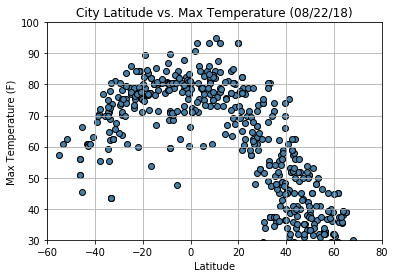

In [20]:
maxTempScatter = weather_df.iloc[:,7].tolist()
latScatter = weather_df.iloc[:,5].tolist()
plt.scatter(latScatter,maxTempScatter, marker="o", facecolors="#4580AA", edgecolors="black")
plt.grid()
plt.ylim(30,100)
plt.xlim(-60,80)
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#### Latitude vs. Humidity Plot

Text(0,0.5,'Humidity (%)')

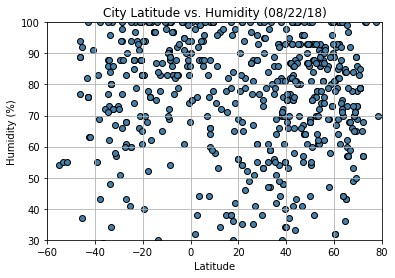

In [21]:
humidityScatter = weather_df.iloc[:,4].tolist()
latScatter = weather_df.iloc[:,5].tolist()
plt.scatter(latScatter,humidityScatter, marker="o", facecolors="#4580AA", edgecolors="black")
plt.grid()
plt.ylim(30,100)
plt.xlim(-60,80)
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#### Latitude vs. Cloudiness Plot

Text(0,0.5,'Cloudiness (%)')

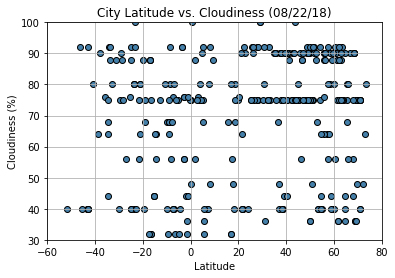

In [22]:
cloudinessScatter = weather_df.iloc[:,1].tolist()
latScatter = weather_df.iloc[:,5].tolist()
plt.scatter(latScatter,cloudinessScatter, marker="o", facecolors="#4580AA", edgecolors="black")
plt.grid()
plt.ylim(30,100)
plt.xlim(-60,80)
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#### Latitude vs. Wind Speed Plot

Text(0,0.5,'Wind Speed (mph)')

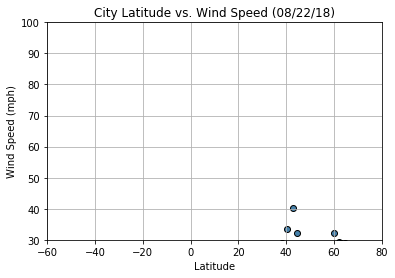

In [29]:
windSpeedScatter = weather_df.iloc[:,8].tolist()
latScatter = weather_df.iloc[:,5].tolist()
plt.scatter(latScatter,windSpeedScatter, marker="o", facecolors="#4580AA", edgecolors="black")
plt.grid()
plt.ylim(30,100)
plt.xlim(-60,80)
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")